In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('image_processing_results.csv')

df = df.rename(columns={df.columns[0]: 'image', df.columns[1]: 'type', df.columns[2]: 'kernel_size', df.columns[3]: 'time'})

df_transformations = df[df['kernel_size'] == 0]
df_filters = df[df['kernel_size'] != 0]

In [3]:
df_transformations

,image,type,kernel_size,time
360,23,rotate,0,0.119129
361,23,schear,0,0.117966
362,17,rotate,0,0.117654
363,17,schear,0,0.117930
364,20,rotate,0,0.118013
...,...,...,...,...
73435,13,schear,0,0.569908
73436,15,rotate,0,0.856976
73437,15,schear,0,0.749106
73438,7,rotate,0,0.733853


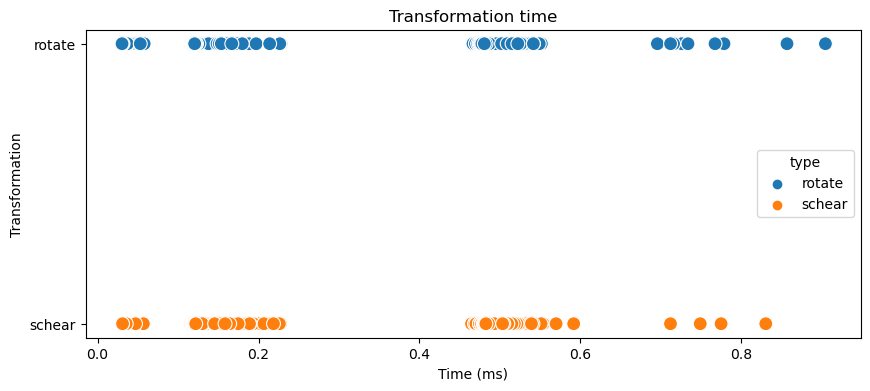

In [4]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_transformations, x='time', y='type', hue='type', s=100)
plt.title('Transformation time')
plt.ylabel('Transformation')
plt.xlabel('Time (ms)')
plt.savefig('transformation_time.png', dpi=300)
plt.show()


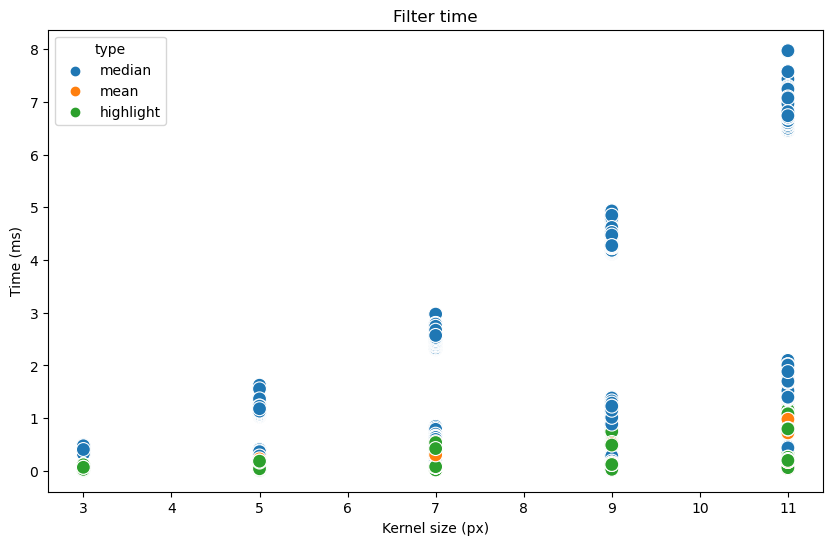

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filters, x='kernel_size', y='time', hue='type', s=100)
plt.title('Filter time')
plt.xlabel('Kernel size (px)')
plt.ylabel('Time (ms)')
plt.savefig('filter_time.png', dpi=300)
plt.show()

In [6]:
df_batch = pd.read_csv('batch_processing_results.csv')
df_batch = df_batch.drop(columns=['image', 'type', 'kernel_size'])
df_batch

,time
0,144.3070
1,144.2770
2,144.1220
3,144.7980
4,144.0870
...,...
175,65.0282
176,65.4023
177,67.5919
178,66.0926


In [14]:
import numpy as np

num_processes = np.repeat([1, 2, 3, 4, 5, 6], 30)[:180]
df_batch['num_processes'] = num_processes
df_batch
    

,time,num_processes
0,144.3070,1
1,144.2770,1
2,144.1220,1
3,144.7980,1
4,144.0870,1
...,...,...
175,65.0282,6
176,65.4023,6
177,67.5919,6
178,66.0926,6


In [18]:
df_batch.to_csv('batch_processing_results_processed.csv', index=False)

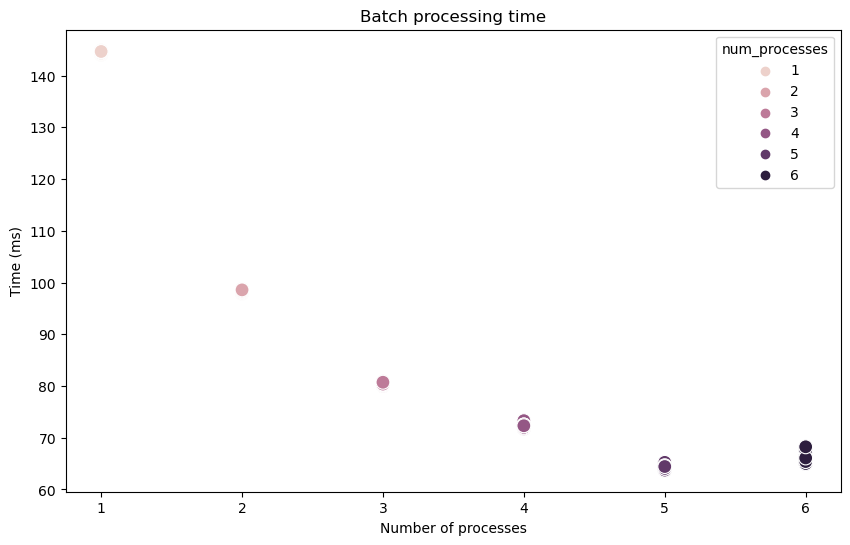

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_batch, x='num_processes', y='time', hue='num_processes', s=100)
plt.title('Batch processing time')
plt.xlabel('Number of processes')
plt.ylabel('Time (ms)')
plt.savefig('batch_processing_time.png', dpi=300)
plt.show()